# Tare 6 (6.2)

Valentina Martínez Garrido 20925164-7

Encuentre la separación óptima entre puntos para el ejemplo con ruido hecho en clase.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Funciones del ejemplo
def deriv3_datos(fxo, fx2, h):
    return (fx2 - fxo)/(2*h)

def deriv3_borde_datos(fxo, fx1, fx2, h):
    return (-3*fxo + 4*fx1 - fx2)/(2*h)

def deriv_datos(fx, h):
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv3_borde_datos(fx[0], fx[1], fx[2], h)
        elif i == n - 1:
            deriv[i] = deriv3_borde_datos(fx[n-1], fx[n-2], fx[n-3], -h)
        else:
            deriv[i] = deriv3_datos(fx[i-1], fx[i+1], h)
    return deriv


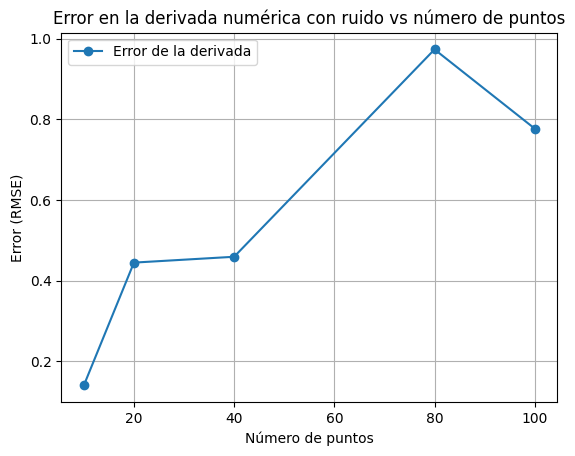

In [5]:
# Función para calcular el error
def calcular_error(deriv_numerica, deriv_exacta):
    return np.sqrt(np.mean((deriv_numerica - deriv_exacta) ** 2))

# Rango de separación h
num_puntos = np.array([10, 20, 40, 80, 100])
errores = []

# Análisis de los puntos
for num in num_puntos:
    x = np.linspace(0, 4, num)  # Puntos distribuidos uniformes
    h = 4 / num  # Separación

    # Datos exactos y con ruido
    datos_e = np.sin(x)
    datos_r = np.sin(x) + np.random.normal(0, 0.05, num)

    # Derivadas exactas
    deriv_exacta = np.cos(x)

    # Derivada numérica para datos ruidosos
    deriv_numerica_r = deriv_datos(datos_r, h)

    # Calcular el error de la derivada con ruido
    error = calcular_error(deriv_numerica_r, deriv_exacta)
    errores.append(error)

# Graficamos el error en función
plt.plot(num_puntos, errores, 'o-', label='Error de la derivada')
plt.xlabel('Número de puntos')
plt.ylabel('Error (RMSE)')
plt.title('Error en la derivada numérica con ruido vs número de puntos')
plt.grid(True)
plt.legend()
plt.show()